In [1]:
import numpy as np
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils.background import Background2D, SExtractorBackground
from astropy.stats import SigmaClip
from astropy.stats import sigma_clipped_stats
from photutils.segmentation import detect_sources
import statmorph
import matplotlib.pyplot as plt
from astropy.visualization import AsinhStretch, PercentileInterval, ImageNormalize

TNG 356678

http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/356678

In [2]:
# Load your galaxy image
image_data = fits.getdata('broadband_356678.fits')

In [3]:
# Estimate the background and subtract it
sigma_clip = SigmaClip(sigma=3.)
bkg_estimator = SExtractorBackground()
bkg = Background2D(image_data, (50, 50), filter_size=(3, 3), sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)
image_data_subtracted = image_data - bkg.background

ValueError: data must be a 2D array.

In [4]:
selected_channel = 0  # example: choosing the first channel
image_data_2d = image_data[selected_channel]

In [5]:
image_data_2d = np.mean(image_data, axis=0)

In [6]:
sigma_clip = SigmaClip(sigma=3.)
bkg_estimator = SExtractorBackground()
bkg = Background2D(image_data_2d, (50, 50), filter_size=(3, 3), sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)
image_data_subtracted = image_data_2d - bkg.background

In [7]:
# Compute the image's mean, median, and standard deviation with sigma clipping
mean, median, std = sigma_clipped_stats(image_data_subtracted, sigma=3.0)

# Set the threshold for detection
threshold = median + (2.0 * std)

# Detect sources in the image
npixels = 5  # minimum number of connected pixels
segm = detect_sources(image_data_subtracted, threshold, npixels)

In [8]:
# Convert boolean segmap to integer type
segmap = segm.data.astype(int)

# Assuming a generic gain value; replace with actual value if available
gain_value = 2.5

# Morphological analysis
source_morphs = statmorph.source_morphology(image_data_subtracted, segmap, gain=gain_value)

# Print morphological properties
morph = source_morphs[0]
print('Concentration:', morph.concentration)
print('Asymmetry:', morph.asymmetry)
print('Smoothness:', morph.smoothness)

Concentration: 1.7174799204259794
Asymmetry: 0.3364886353655491
Smoothness: 0.052666966445641034


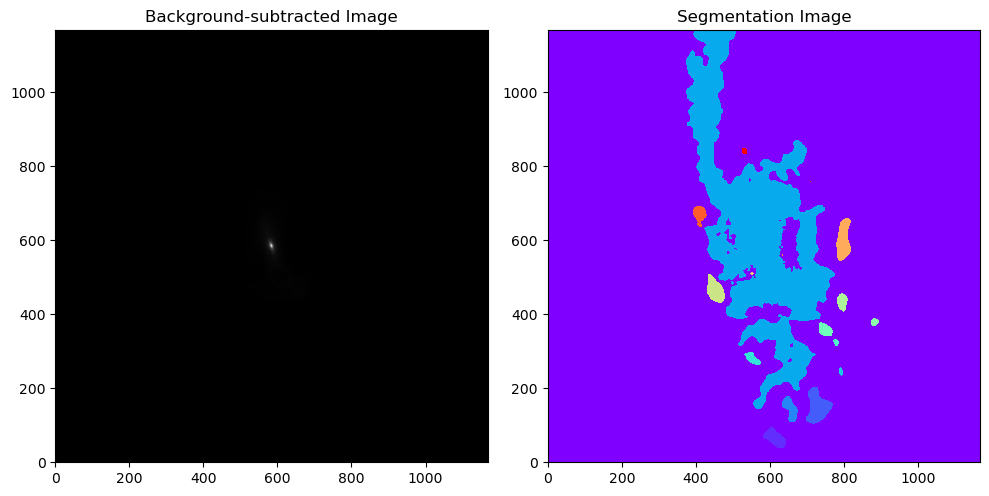

In [9]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(image_data_subtracted, cmap='gray', origin='lower')
plt.title('Background-subtracted Image')

plt.subplot(1, 2, 2)
plt.imshow(segm, origin='lower', cmap='rainbow', interpolation='nearest')
plt.title('Segmentation Image')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Original Image')

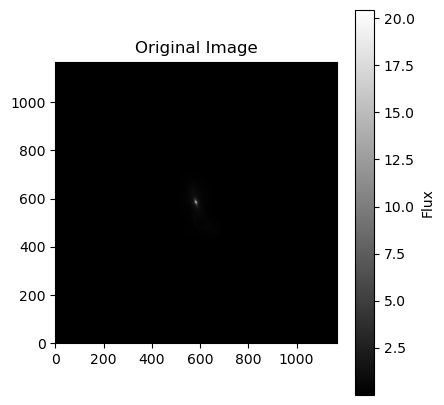

In [10]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(image_data_2d, cmap='gray', origin='lower')
plt.colorbar(label='Flux')
plt.title('Original Image')

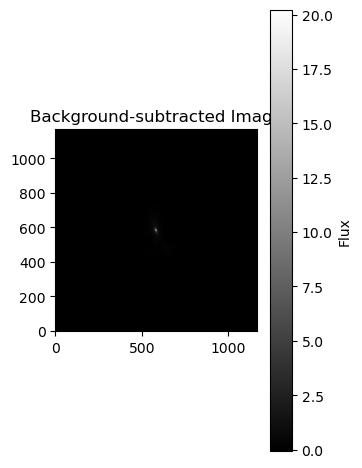

In [11]:
plt.subplot(1, 2, 2)
plt.imshow(image_data_subtracted, cmap='gray', origin='lower')
plt.colorbar(label='Flux')
plt.title('Background-subtracted Image')

plt.tight_layout()
plt.show()

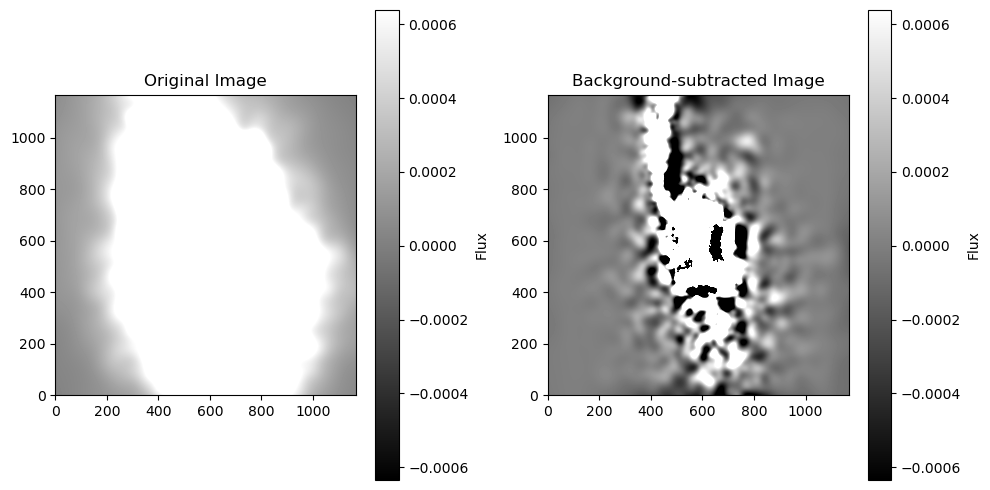

In [12]:
# Compute the image's mean and standard deviation
mean, median, std = sigma_clipped_stats(image_data_subtracted, sigma=3.0)

# Define the limits for the color map scale
vmin = median - 2.0 * std
vmax = median + 2.0 * std

plt.figure(figsize=(10,5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_data_2d, cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar(label='Flux')
plt.title('Original Image')

# Display the background-subtracted image
plt.subplot(1, 2, 2)
plt.imshow(image_data_subtracted, cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar(label='Flux')
plt.title('Background-subtracted Image')

plt.tight_layout()
plt.show()

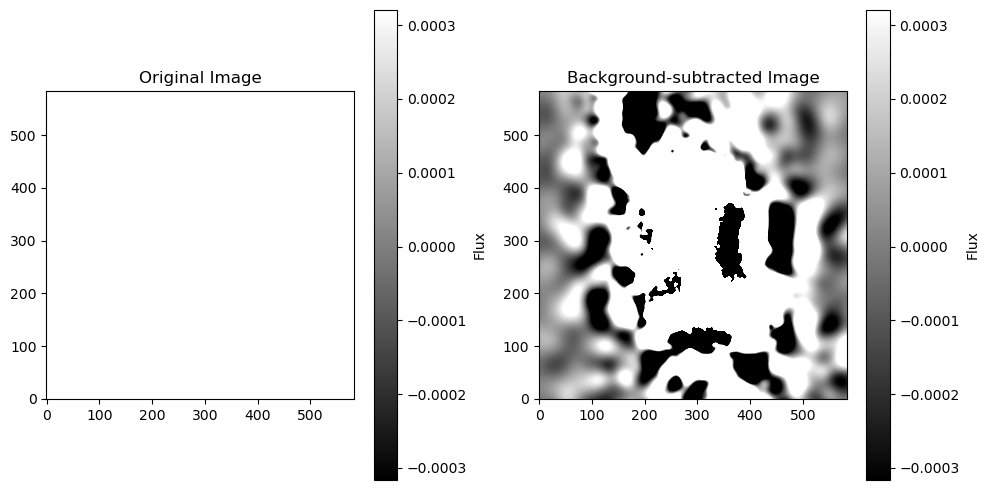

In [13]:
# Define the central coordinates
center_x, center_y = image_data_2d.shape[1] // 2, image_data_2d.shape[0] // 2

# Define the zoom window size
window_size = image_data_2d.shape[0] // 4

# Set the zoom limits
x1, x2 = center_x - window_size, center_x + window_size
y1, y2 = center_y - window_size, center_y + window_size

# Adjust the limits for the color map scale to reduce brightness
vmin = median - 1.0 * std
vmax = median + 1.0 * std

plt.figure(figsize=(10,5))

# Display the original image with adjusted zoom and brightness
plt.subplot(1, 2, 1)
plt.imshow(image_data_2d[y1:y2, x1:x2], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar(label='Flux')
plt.title('Original Image')

# Display the background-subtracted image with adjusted zoom and brightness
plt.subplot(1, 2, 2)
plt.imshow(image_data_subtracted[y1:y2, x1:x2], cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar(label='Flux')
plt.title('Background-subtracted Image')

plt.tight_layout()
plt.show()

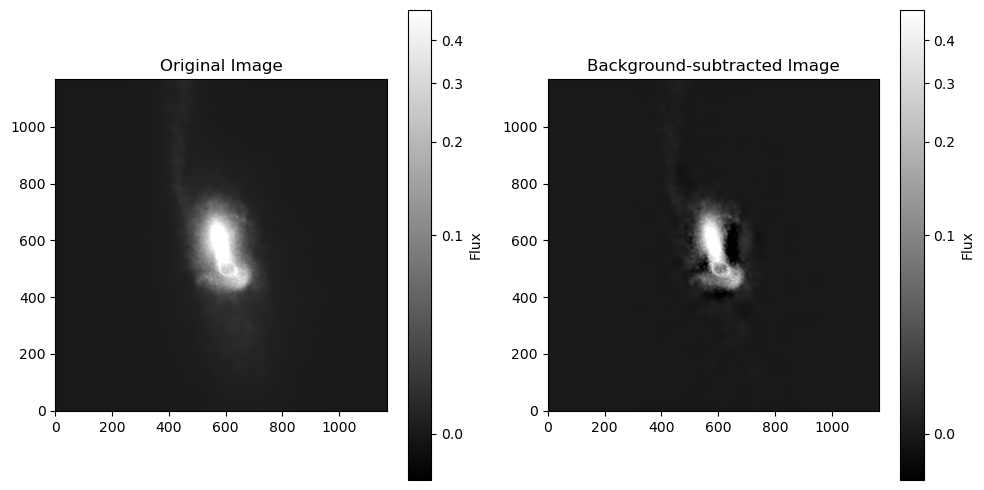

In [14]:
# Define normalization based on percentiles and asinh stretch
norm = ImageNormalize(image_data_subtracted, interval=PercentileInterval(99.5), stretch=AsinhStretch())

plt.figure(figsize=(10,5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_data_2d, cmap='gray', origin='lower', norm=norm)
plt.colorbar(label='Flux')
plt.title('Original Image')

# Display the background-subtracted image
plt.subplot(1, 2, 2)
plt.imshow(image_data_subtracted, cmap='gray', origin='lower', norm=norm)
plt.colorbar(label='Flux')
plt.title('Background-subtracted Image')

plt.tight_layout()
plt.show()

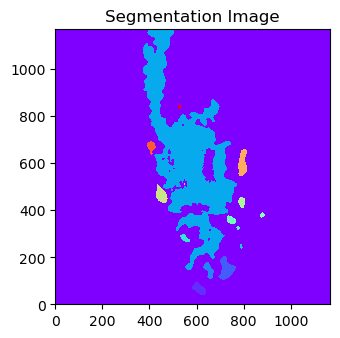

In [15]:
plt.subplot(1, 2, 2)
plt.imshow(segm, origin='lower', cmap='rainbow', interpolation='nearest')
plt.title('Segmentation Image')

plt.tight_layout()
plt.show()

In [16]:
morph = source_morphs[0]
print(f'Concentration: {morph.concentration}')
print(f'Asymmetry: {morph.asymmetry}')
print(f'Smoothness: {morph.smoothness}')

Concentration: 1.7174799204259794
Asymmetry: 0.3364886353655491
Smoothness: 0.052666966445641034


TNG 356678 there is possibility of a marge due to Asymmetry be close at 0.3 as it suggest 10.48550/arXiv.astro-ph/0303065

-------------

TNG 359811

http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/359811

In [17]:
# Load your galaxy image
image_data = fits.getdata('broadband_359811.fits')

In [18]:
selected_channel = 0  # example: choosing the first channel
image_data_2d = image_data[selected_channel]

In [19]:
image_data_2d = np.mean(image_data, axis=0)

In [20]:
sigma_clip = SigmaClip(sigma=3.)
bkg_estimator = SExtractorBackground()
bkg = Background2D(image_data_2d, (50, 50), filter_size=(3, 3), sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)
image_data_subtracted = image_data_2d - bkg.background

In [21]:
# Compute the image's mean, median, and standard deviation with sigma clipping
mean, median, std = sigma_clipped_stats(image_data_subtracted, sigma=3.0)

# Set the threshold for detection
threshold = median + (2.0 * std)

# Detect sources in the image
npixels = 5  # minimum number of connected pixels
segm = detect_sources(image_data_subtracted, threshold, npixels)

In [22]:
# Convert boolean segmap to integer type
segmap = segm.data.astype(int)

# Assuming a generic gain value; replace with actual value if available
gain_value = 2.5

# Morphological analysis
source_morphs = statmorph.source_morphology(image_data_subtracted, segmap, gain=gain_value)

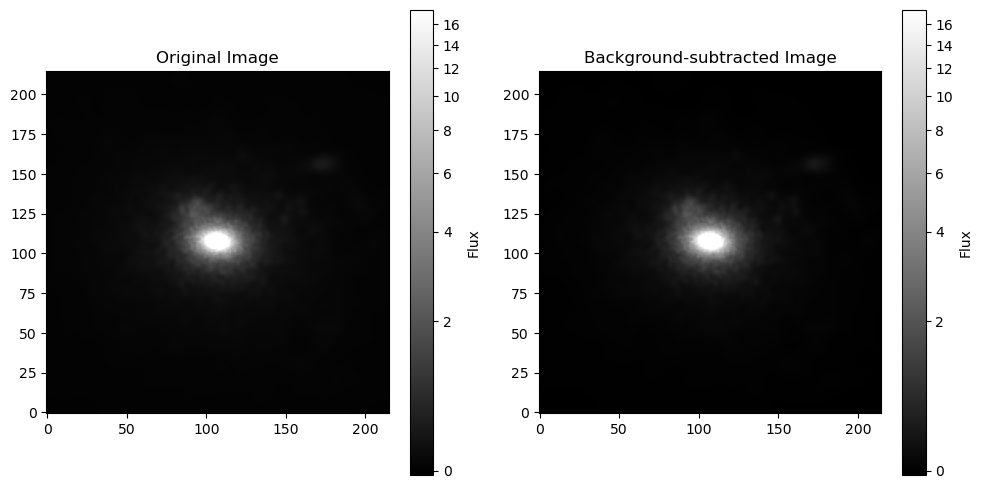

In [23]:
# Define normalization based on percentiles and asinh stretch
norm = ImageNormalize(image_data_subtracted, interval=PercentileInterval(99.5), stretch=AsinhStretch())

plt.figure(figsize=(10,5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_data_2d, cmap='gray', origin='lower', norm=norm)
plt.colorbar(label='Flux')
plt.title('Original Image')

# Display the background-subtracted image
plt.subplot(1, 2, 2)
plt.imshow(image_data_subtracted, cmap='gray', origin='lower', norm=norm)
plt.colorbar(label='Flux')
plt.title('Background-subtracted Image')

plt.tight_layout()
plt.show()

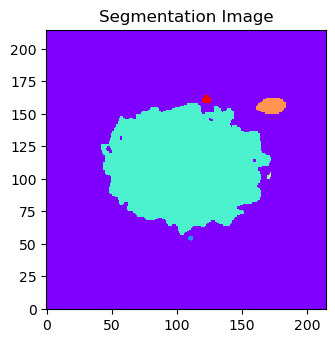

In [24]:
plt.subplot(1, 2, 2)
plt.imshow(segm, origin='lower', cmap='rainbow', interpolation='nearest')
plt.title('Segmentation Image')

plt.tight_layout()
plt.show()

In [25]:
morph = source_morphs[0]
print(f'Concentration: {morph.concentration}')
print(f'Asymmetry: {morph.asymmetry}')
print(f'Smoothness: {morph.smoothness}')

Concentration: 1.7826370024333282
Asymmetry: -0.07102309607202359
Smoothness: -0.008207065228469422


TNG 359811 is a spiral galaxy due to the fact that "Concentration" is close to 2

-----------

TNG 408764

http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/408764

In [26]:
# Load your galaxy image
image_data = fits.getdata('broadband_408764.fits')

In [27]:
selected_channel = 0  # example: choosing the first channel
image_data_2d = image_data[selected_channel]

In [28]:
image_data_2d = np.mean(image_data, axis=0)

In [29]:
sigma_clip = SigmaClip(sigma=3.)
bkg_estimator = SExtractorBackground()
bkg = Background2D(image_data_2d, (50, 50), filter_size=(3, 3), sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)
image_data_subtracted = image_data_2d - bkg.background

In [30]:
# Compute the image's mean, median, and standard deviation with sigma clipping
mean, median, std = sigma_clipped_stats(image_data_subtracted, sigma=3.0)

# Set the threshold for detection
threshold = median + (2.0 * std)

# Detect sources in the image
npixels = 5  # minimum number of connected pixels
segm = detect_sources(image_data_subtracted, threshold, npixels)

In [31]:
# Convert boolean segmap to integer type
segmap = segm.data.astype(int)

# Assuming a generic gain value; replace with actual value if available
gain_value = 2.5

# Morphological analysis
source_morphs = statmorph.source_morphology(image_data_subtracted, segmap, gain=gain_value)

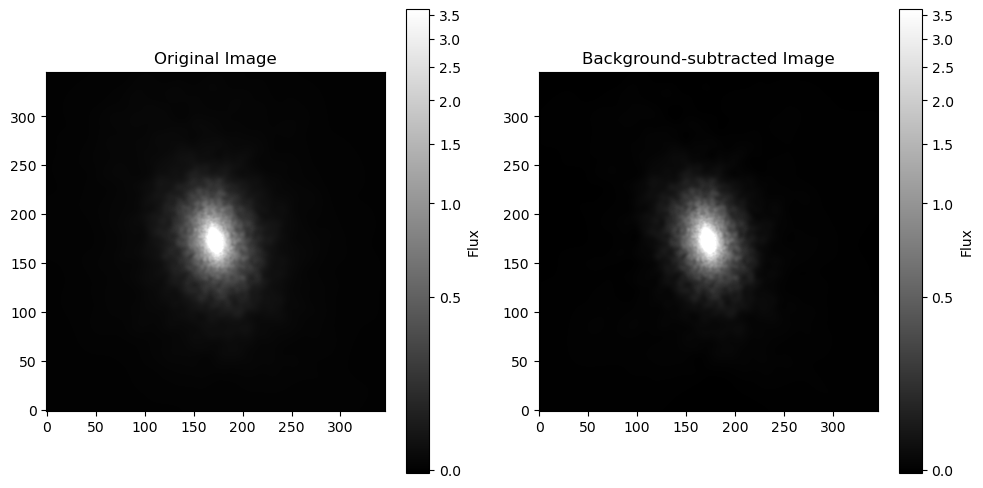

In [32]:
# Define normalization based on percentiles and asinh stretch
norm = ImageNormalize(image_data_subtracted, interval=PercentileInterval(99.5), stretch=AsinhStretch())

plt.figure(figsize=(10,5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_data_2d, cmap='gray', origin='lower', norm=norm)
plt.colorbar(label='Flux')
plt.title('Original Image')

# Display the background-subtracted image
plt.subplot(1, 2, 2)
plt.imshow(image_data_subtracted, cmap='gray', origin='lower', norm=norm)
plt.colorbar(label='Flux')
plt.title('Background-subtracted Image')

plt.tight_layout()
plt.show()

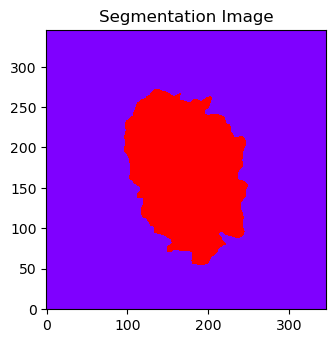

In [33]:
plt.subplot(1, 2, 2)
plt.imshow(segm, origin='lower', cmap='rainbow', interpolation='nearest')
plt.title('Segmentation Image')

plt.tight_layout()
plt.show()

In [34]:
morph = source_morphs[0]
print(f'Concentration: {morph.concentration}')
print(f'Asymmetry: {morph.asymmetry}')
print(f'Smoothness: {morph.smoothness}')

Concentration: 4.544331959893811
Asymmetry: 0.11417268160650916
Smoothness: 0.030453658886801023


TNG 408764 is an elliptical due to the fact that "Concentration" value 3 and above

---------

Ill 305959

http://www.tng-project.org/api/Illustris-1/snapshots/z=0/subhalos/305959

In [35]:
# Load your galaxy image
image_data = fits.getdata('broadband_305959.fits')

In [36]:
selected_channel = 0  # example: choosing the first channel
image_data_2d = image_data[selected_channel]

In [37]:
image_data_2d = np.mean(image_data, axis=0)

In [38]:
sigma_clip = SigmaClip(sigma=3.)
bkg_estimator = SExtractorBackground()
bkg = Background2D(image_data_2d, (50, 50), filter_size=(3, 3), sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)
image_data_subtracted = image_data_2d - bkg.background

In [39]:
# Compute the image's mean, median, and standard deviation with sigma clipping
mean, median, std = sigma_clipped_stats(image_data_subtracted, sigma=3.0)

# Set the threshold for detection
threshold = median + (2.0 * std)

# Detect sources in the image
npixels = 5  # minimum number of connected pixels
segm = detect_sources(image_data_subtracted, threshold, npixels)

In [40]:
# Convert boolean segmap to integer type
segmap = segm.data.astype(int)

# Assuming a generic gain value; replace with actual value if available
gain_value = 2.5

# Morphological analysis
source_morphs = statmorph.source_morphology(image_data_subtracted, segmap, gain=gain_value)

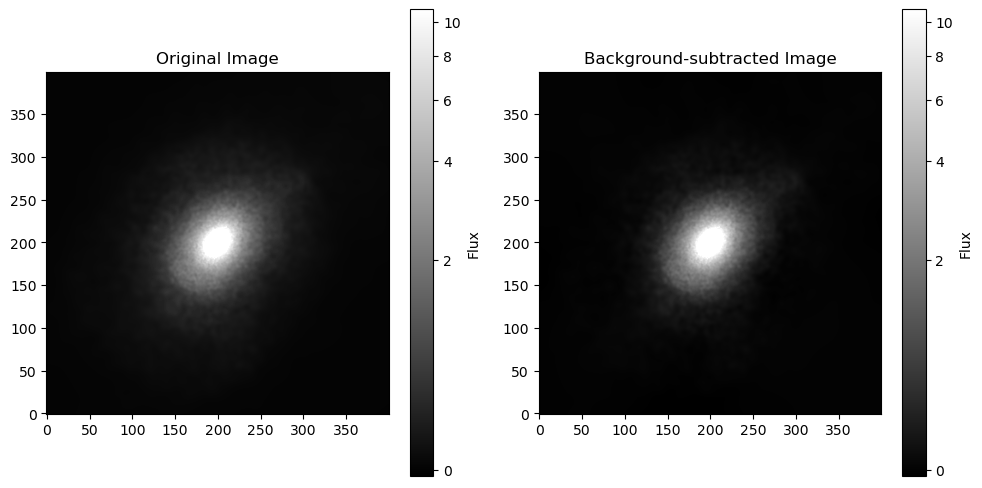

In [41]:
# Define normalization based on percentiles and asinh stretch
norm = ImageNormalize(image_data_subtracted, interval=PercentileInterval(99), stretch=AsinhStretch())

plt.figure(figsize=(10,5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_data_2d, cmap='gray', origin='lower', norm=norm)
plt.colorbar(label='Flux')
plt.title('Original Image')

# Display the background-subtracted image
plt.subplot(1, 2, 2)
plt.imshow(image_data_subtracted, cmap='gray', origin='lower', norm=norm)
plt.colorbar(label='Flux')
plt.title('Background-subtracted Image')

plt.tight_layout()
plt.show()

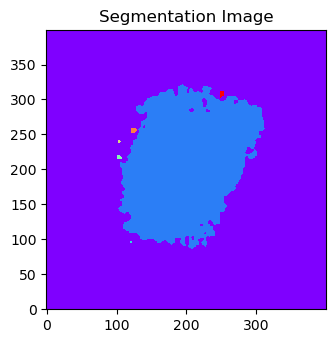

In [42]:
plt.subplot(1, 2, 2)
plt.imshow(segm, origin='lower', cmap='rainbow', interpolation='nearest')
plt.title('Segmentation Image')

plt.tight_layout()
plt.show()

In [43]:
morph = source_morphs[0]
print(f'Concentration: {morph.concentration}')
print(f'Asymmetry: {morph.asymmetry}')
print(f'Smoothness: {morph.smoothness}')

Concentration: 3.935644601661675
Asymmetry: 0.11048572279717066
Smoothness: 0.023363681430443407


Ill 305959 is an elliptical due to the fact that "Concentration" value 3 and above

------

Ill 321863

http://www.tng-project.org/api/Illustris-1/snapshots/z=0/subhalos/321863

In [44]:
# Load your galaxy image
image_data = fits.getdata('broadband_321863.fits')

In [45]:
selected_channel = 0  # example: choosing the first channel
image_data_2d = image_data[selected_channel]

In [46]:
image_data_2d = np.mean(image_data, axis=0)

In [47]:
sigma_clip = SigmaClip(sigma=3.)
bkg_estimator = SExtractorBackground()
bkg = Background2D(image_data_2d, (50, 50), filter_size=(3, 3), sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)
image_data_subtracted = image_data_2d - bkg.background

In [48]:
# Compute the image's mean, median, and standard deviation with sigma clipping
mean, median, std = sigma_clipped_stats(image_data_subtracted, sigma=3.0)

# Set the threshold for detection
threshold = median + (2.0 * std)

# Detect sources in the image
npixels = 5  # minimum number of connected pixels
segm = detect_sources(image_data_subtracted, threshold, npixels)

In [49]:
# Convert boolean segmap to integer type
segmap = segm.data.astype(int)

# Assuming a generic gain value; replace with actual value if available
gain_value = 2.5

# Morphological analysis
source_morphs = statmorph.source_morphology(image_data_subtracted, segmap, gain=gain_value)

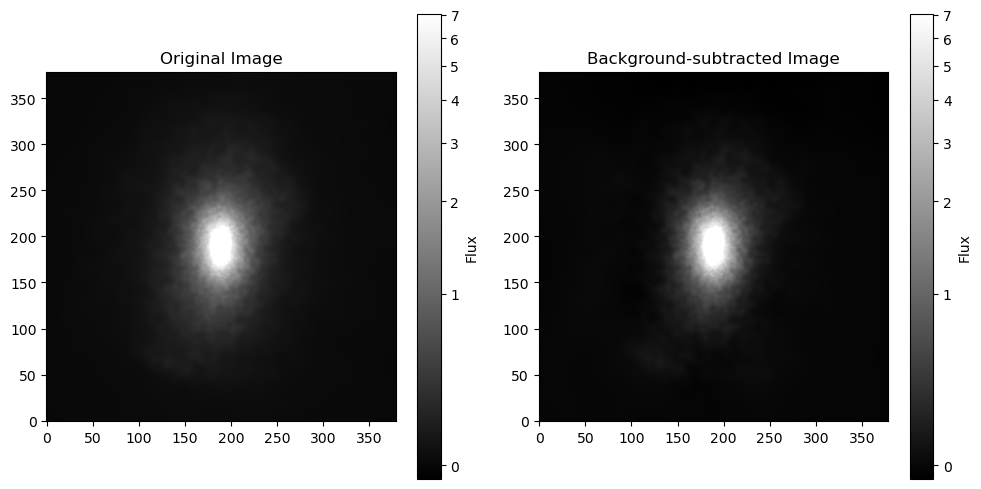

In [50]:
# Define normalization based on percentiles and asinh stretch
norm = ImageNormalize(image_data_subtracted, interval=PercentileInterval(99), stretch=AsinhStretch())

plt.figure(figsize=(10,5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_data_2d, cmap='gray', origin='lower', norm=norm)
plt.colorbar(label='Flux')
plt.title('Original Image')

# Display the background-subtracted image
plt.subplot(1, 2, 2)
plt.imshow(image_data_subtracted, cmap='gray', origin='lower', norm=norm)
plt.colorbar(label='Flux')
plt.title('Background-subtracted Image')

plt.tight_layout()
plt.show()

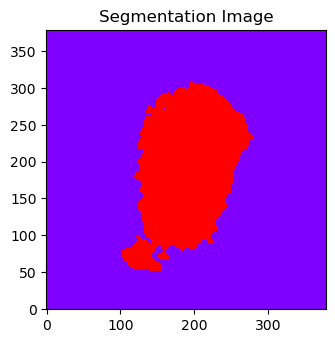

In [51]:
plt.subplot(1, 2, 2)
plt.imshow(segm, origin='lower', cmap='rainbow', interpolation='nearest')
plt.title('Segmentation Image')

plt.tight_layout()
plt.show()

In [52]:
morph = source_morphs[0]
print(f'Concentration: {morph.concentration}')
print(f'Asymmetry: {morph.asymmetry}')
print(f'Smoothness: {morph.smoothness}')

Concentration: 3.722160028387536
Asymmetry: 0.08240461313516607
Smoothness: 0.019977149594153375


Ill 321863 is an elliptical due to the fact that "Concentration" value 3 and above

----

Ill 347122

http://www.tng-project.org/api/Illustris-1/snapshots/z=0/subhalos/347122

In [53]:
# Load your galaxy image
image_data = fits.getdata('broadband_347122.fits')

In [54]:
selected_channel = 0  # example: choosing the first channel
image_data_2d = image_data[selected_channel]

In [55]:
image_data_2d = np.mean(image_data, axis=0)

In [56]:
sigma_clip = SigmaClip(sigma=3.)
bkg_estimator = SExtractorBackground()
bkg = Background2D(image_data_2d, (50, 50), filter_size=(3, 3), sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)
image_data_subtracted = image_data_2d - bkg.background

In [57]:
# Compute the image's mean, median, and standard deviation with sigma clipping
mean, median, std = sigma_clipped_stats(image_data_subtracted, sigma=3.0)

# Set the threshold for detection
threshold = median + (2.0 * std)

# Detect sources in the image
npixels = 5  # minimum number of connected pixels
segm = detect_sources(image_data_subtracted, threshold, npixels)

In [58]:
# Convert boolean segmap to integer type
segmap = segm.data.astype(int)

# Assuming a generic gain value; replace with actual value if available
gain_value = 2.5

# Morphological analysis
source_morphs = statmorph.source_morphology(image_data_subtracted, segmap, gain=gain_value)

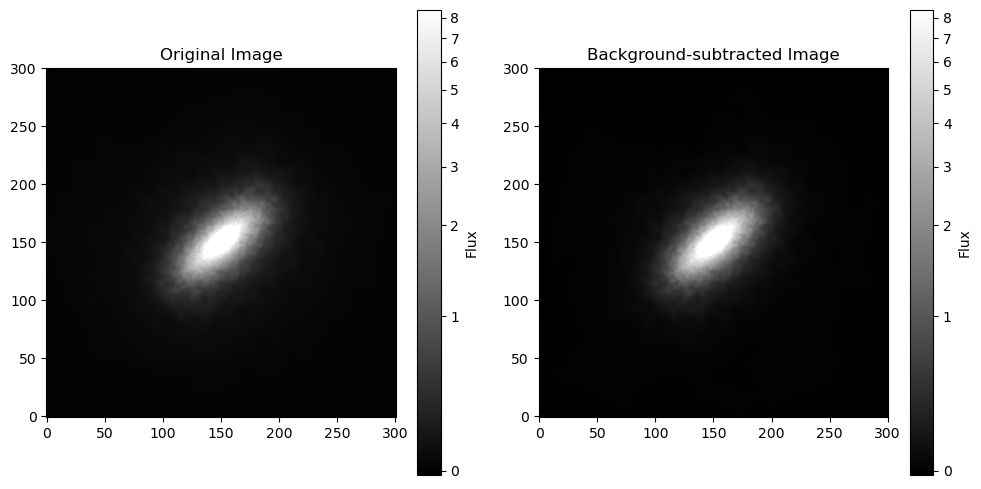

In [59]:
# Define normalization based on percentiles and asinh stretch
norm = ImageNormalize(image_data_subtracted, interval=PercentileInterval(99), stretch=AsinhStretch())

plt.figure(figsize=(10,5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_data_2d, cmap='gray', origin='lower', norm=norm)
plt.colorbar(label='Flux')
plt.title('Original Image')

# Display the background-subtracted image
plt.subplot(1, 2, 2)
plt.imshow(image_data_subtracted, cmap='gray', origin='lower', norm=norm)
plt.colorbar(label='Flux')
plt.title('Background-subtracted Image')

plt.tight_layout()
plt.show()

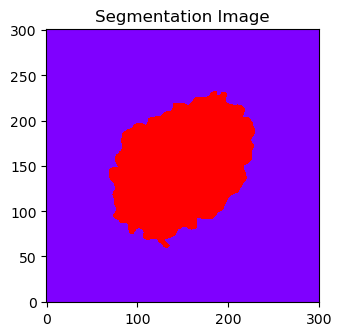

In [60]:
plt.subplot(1, 2, 2)
plt.imshow(segm, origin='lower', cmap='rainbow', interpolation='nearest')
plt.title('Segmentation Image')

plt.tight_layout()
plt.show()

In [61]:
morph = source_morphs[0]
print(f'Concentration: {morph.concentration}')
print(f'Asymmetry: {morph.asymmetry}')
print(f'Smoothness: {morph.smoothness}')

Concentration: 3.723054608145521
Asymmetry: 0.12686043548220105
Smoothness: 0.023947633713830276


Ill 347122 is an elliptical due to the fact that "Concentration" value 3 and above possibly a spiral galaxy with a significant bulge